In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [3]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [4]:
df_france = country_df("top_leagues_19_20/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("top_leagues_19_20/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("top_leagues_19_20/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("top_leagues_19_20/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("top_leagues_19_20/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

2018 - 2019

In [5]:
df_teams_last_first = pd.read_csv("germany-bundesliga-teams-2018-to-2019-stats.csv")

In [6]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [7]:
df_teams_last_17_18 = pd.read_csv("germany-bundesliga-teams-2017-to-2018-stats.csv")

In [8]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [9]:
df_teams_last_16_17 = pd.read_csv("germany-bundesliga-teams-2016-to-2017-stats.csv")

In [10]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [11]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [12]:
df_league_climbers = pd.concat([df_nueremberg, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']
df_all_climbers[columns] = df_all_climbers[columns] * .75


In [13]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

## Build the matrix

In [14]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [15]:
# df_all = df_all.iloc[:25, :]

In [16]:
df_teams_numerical = df_all.iloc[8:,:]

In [17]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [18]:
X = df_norm.as_matrix()

## AA Analysis

In [19]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=50,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 4.091250909852641
RSS = 3.81833421243134
RSS = 3.745928504686118
RSS = 3.7102007402358654
RSS = 3.6890603270331033
RSS = 3.676192115336565
RSS = 3.668499671043731
RSS = 3.664394250038272
RSS = 3.6623597408853645
RSS = 3.6615095354120375
RSS = 3.660918313782759
RSS = 3.6606628195834885
RSS = 3.6604687372649827
RSS = 3.6603339160908677
RSS = 3.6602349721218217
RSS = 3.660090346504616
RSS = 3.660001628239482
RSS = 3.659949523980466
RSS = 3.659985515433741
RSS = 3.659907727911228
RSS = 3.6599840084150603
RSS = 3.6599023628195924
RSS = 3.659944968787206
RSS = 3.6599322542182184
RSS = 3.6598746836890417
RSS = 3.659833718032611
RSS = 3.6599345555025744
RSS = 3.659892637257703
RSS = 3.659912485965517
RSS = 3.659855146575293
RSS = 3.6598942776555505
RSS = 3.6598650215995017
RSS = 3.659847237420052
RSS = 3.6598481699354473
RSS = 3.6599070607645783
RSS = 3.6599132461402637
RSS = 3.6598961229520808
RSS = 3.6598497350079278
RSS = 3.6599095133920567
RSS = 3.659878712405259
RSS = 3.659922069899

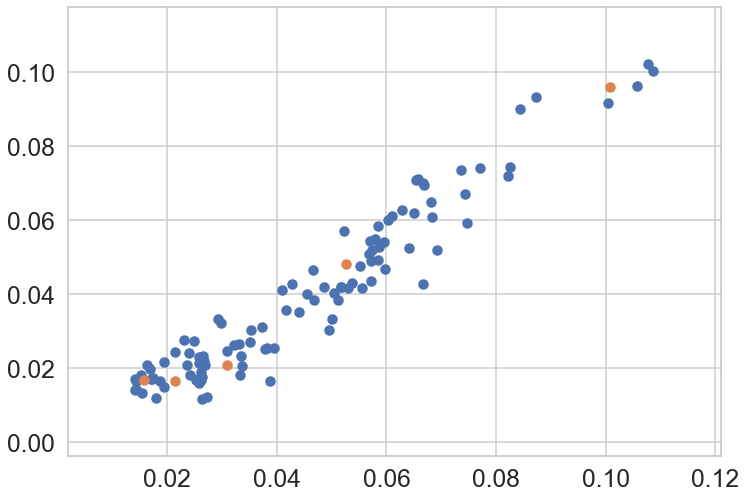

In [20]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

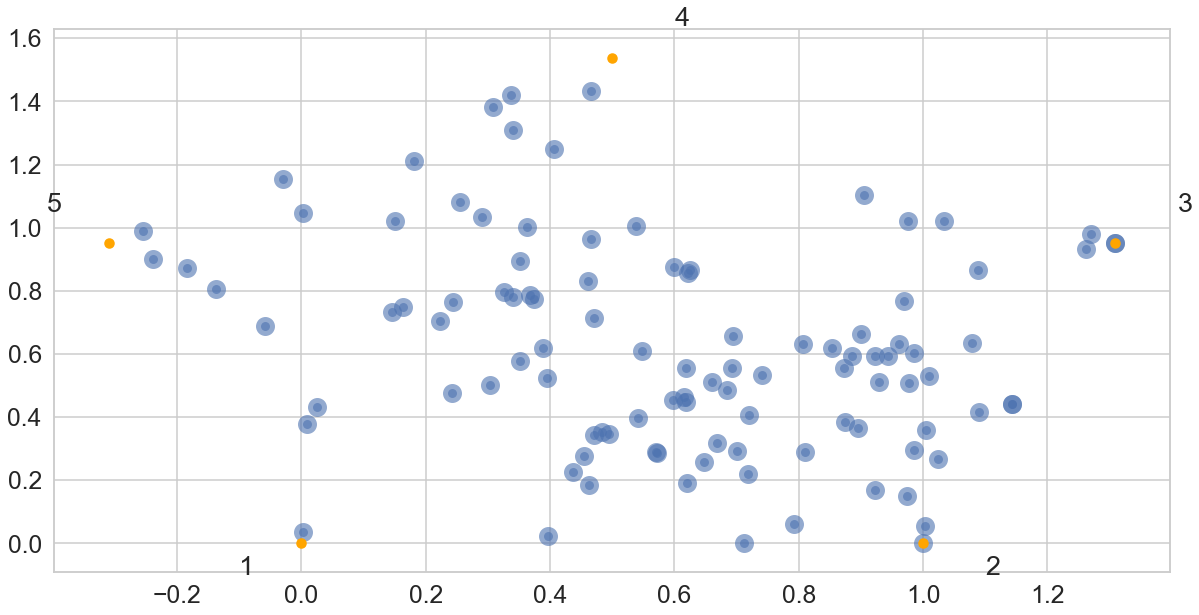

In [21]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [22]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [23]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.946 0.015 0.000 0.000 0.039 
1. FC Union Berlin                      0.571 0.404 0.001 0.000 0.024 
1. FSV Mainz 05                         0.473 0.000 0.288 0.000 0.239 
BVB 09 Borussia Dortmund                0.068 0.000 0.000 0.932 0.000 
Bayer 04 Leverkusen                     0.050 0.108 0.000 0.373 0.469 
Borussia VfL Mönchengladbach            0.221 0.152 0.000 0.627 0.000 
Düsseldorfer TuS Fortuna 1895           0.512 0.000 0.474 0.000 0.014 
Eintracht Frankfurt                     0.140 0.000 0.338 0.318 0.204 
FC Augsburg                             0.528 0.000 0.472 0.000 0.000 
FC Bayern München                       0.000 0.000 0.000 0.345 0.655 
FC Schalke 04                           0.378 0.375 0.025 0.193 0.029 
Hertha BSC                              0.630 0.000 0.369 0.000 0.000 
Rasen Ballsport Leipzig                 0.082 0.000 0.000 0.574 0.344 
SC Freiburg                             0.384 0.163 0.000 0.000 0.452 
SC Pad

## Merge Result with original dataframe

In [24]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [25]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [26]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.946224,0.014662,0.000133,0.000221,0.038760,Köln
1,0.571274,0.403677,0.000731,0.000155,0.024164,Union Berlin
2,0.472868,0.000000,0.287730,0.000000,0.239402,Mainz 05
3,0.067752,0.000000,0.000044,0.932115,0.000089,Borussia Dortmund
4,0.049945,0.108106,0.000044,0.373245,0.468660,Bayer Leverkusen
...,...,...,...,...,...,...
99,0.076633,0.012381,0.838915,0.000000,0.072071,Hannover 96
100,0.028151,0.000000,0.959092,0.012757,0.000000,Stuttgart
101,0.000000,0.416988,0.393156,0.000000,0.189856,Hamburger SV
102,0.000000,0.334286,0.514596,0.000000,0.151118,Darmstadt 98


## Save Result as Pickle file

In [27]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")